# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/armak/Python_projects_WSL/Hospital Readmissions - DataCamp/hospital_readmissions.csv')
df.head(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
7,[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
8,[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes
9,[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no


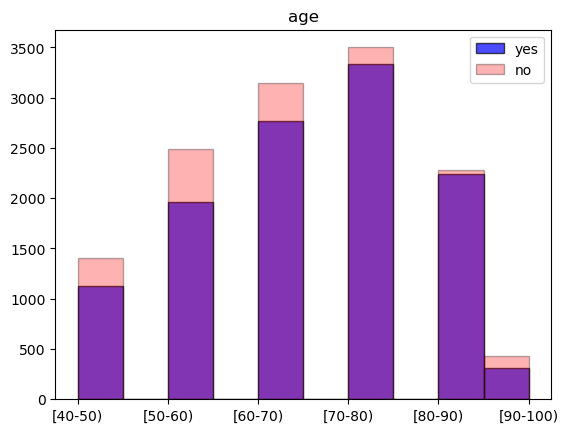

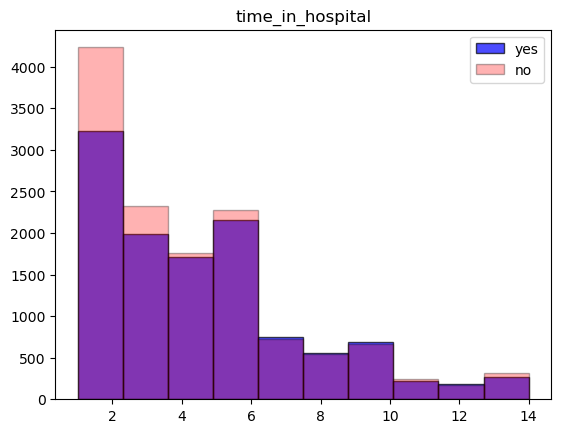

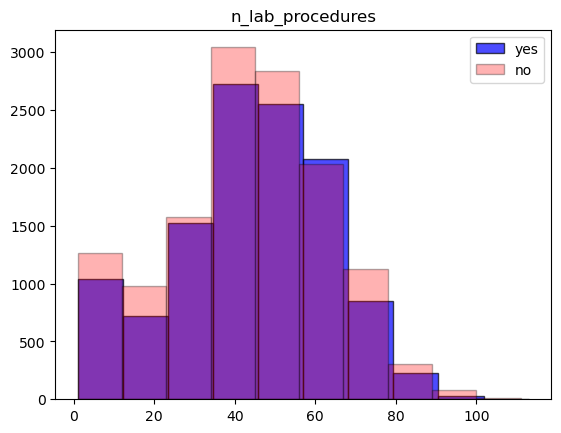

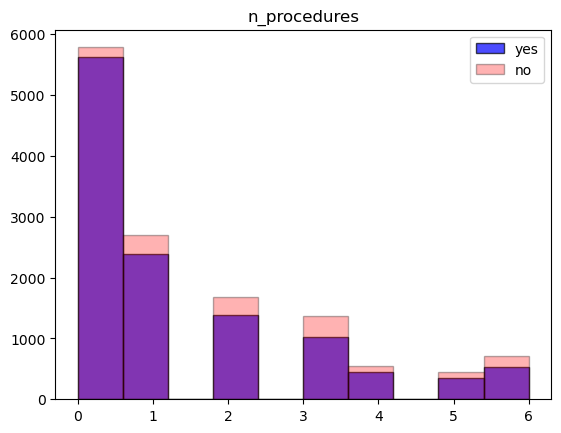

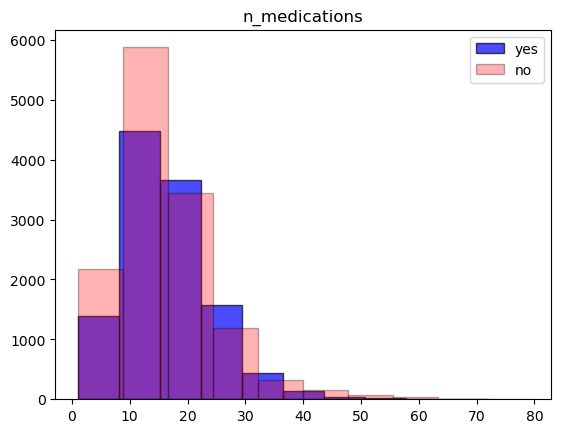

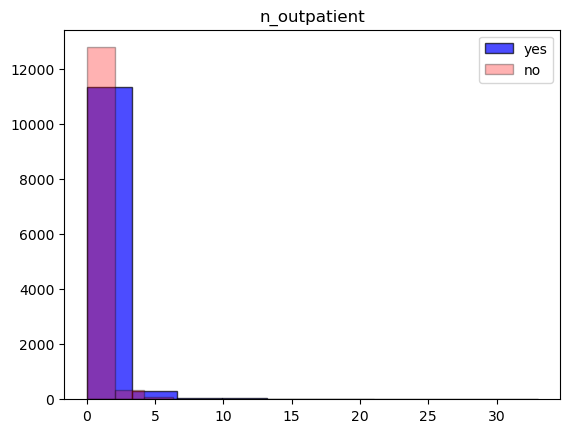

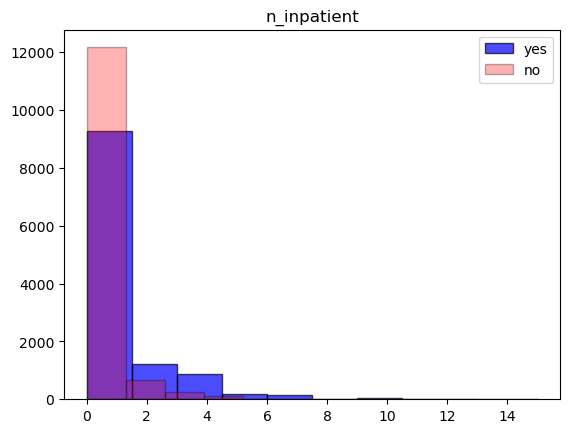

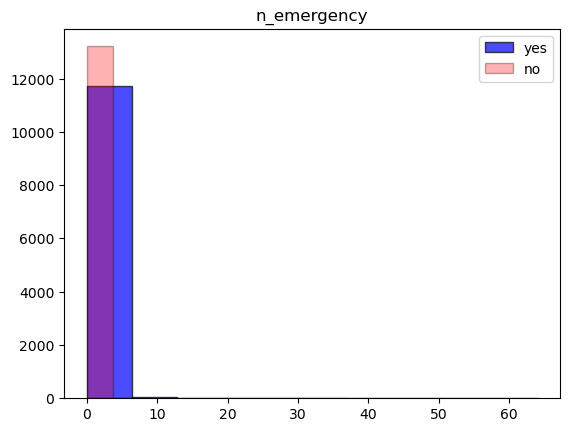

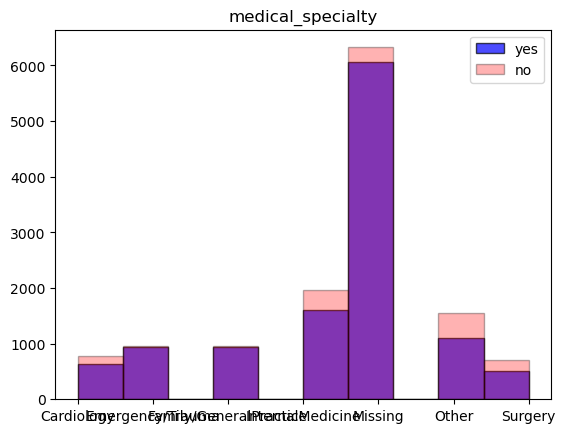

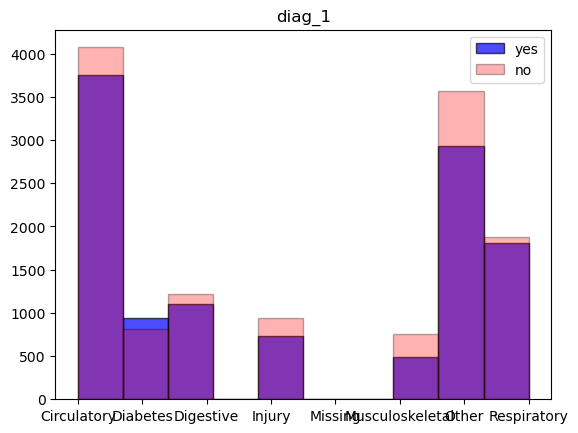

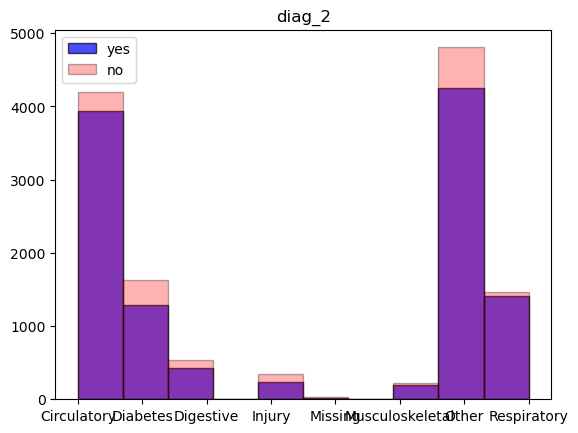

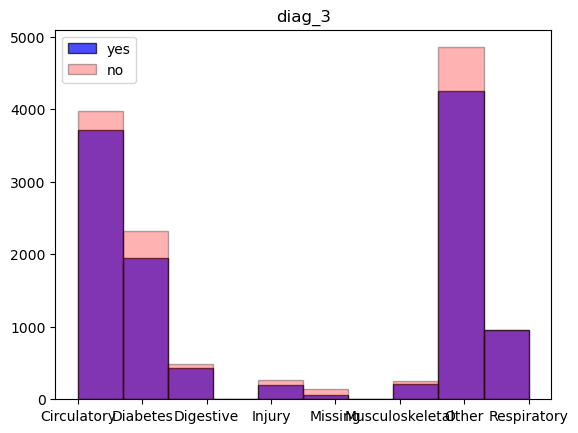

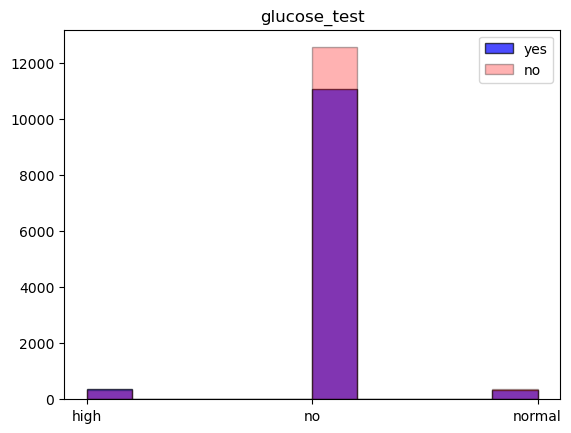

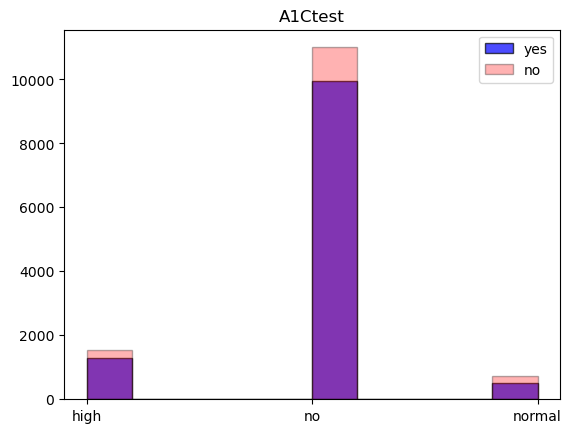

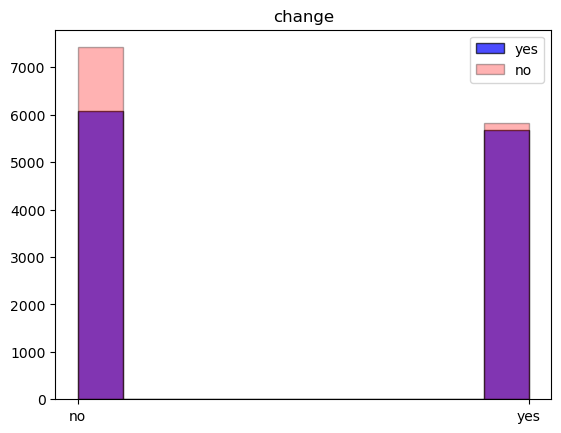

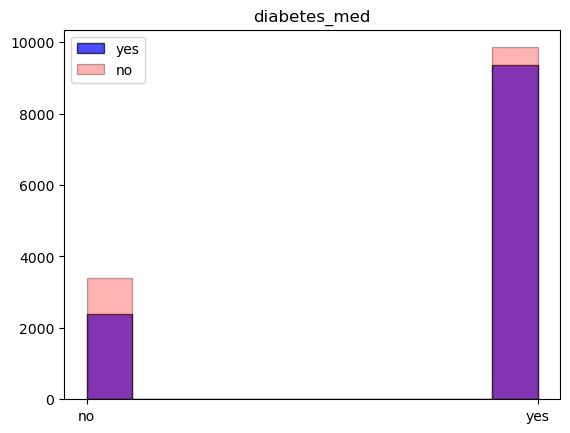

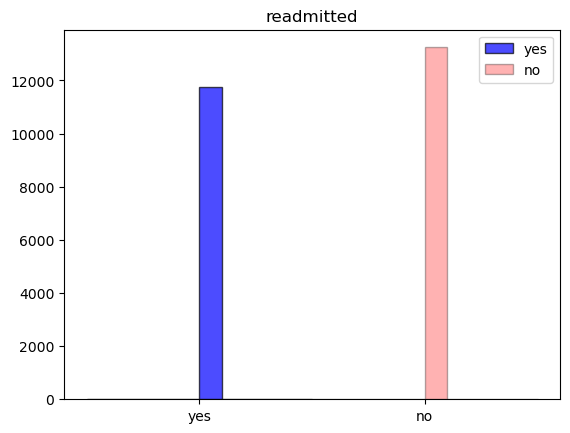

In [3]:
for i in df.columns:
    plt.hist(df[df['readmitted'] == 'yes'][i].sort_values(), color='blue', edgecolor='black', alpha=0.7)
    plt.hist(df[df['readmitted'] == 'no'][i].sort_values(), color='red', edgecolor='black', alpha=0.3)
    plt.title(i)
    plt.legend(['yes', 'no'])
    plt.show()

[70-80)     48.793330
[60-70)     46.845933
[80-90)     49.579274
[50-60)     44.159928
[40-50)     44.510269
[90-100)    42.133333
Name: age, dtype: float64


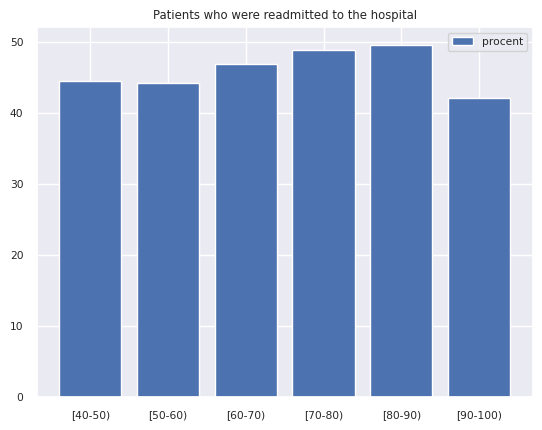

In [20]:
procent = df[df['readmitted'] == 'yes']['age'].value_counts() / df['age'].value_counts() * 100 # ile procent pacjentów ponownie trafiło do szpitala
print(procent)
plt.bar(procent.sort_index().index, procent.sort_index().values)
plt.title('Patients who were readmitted to the hospital')
plt.legend(['procent'])
plt.show()

In [4]:
df.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [49]:
df.drop(df[df['diag_1'] == 'Missing'].index, axis=0, inplace=True) # delete rows with missing values

In [6]:
df_enc = pd.get_dummies(data=df, columns=['age', 
                    'medical_specialty',
                    'diag_1',       
                    'diag_2',       
                    'diag_3',       
                    'glucose_test', 
                    'A1Ctest',      
                    'change',       
                    'diabetes_med'])

In [7]:
df_enc['readmitted'] = df['readmitted'].map({'no': 0,'yes': 1})

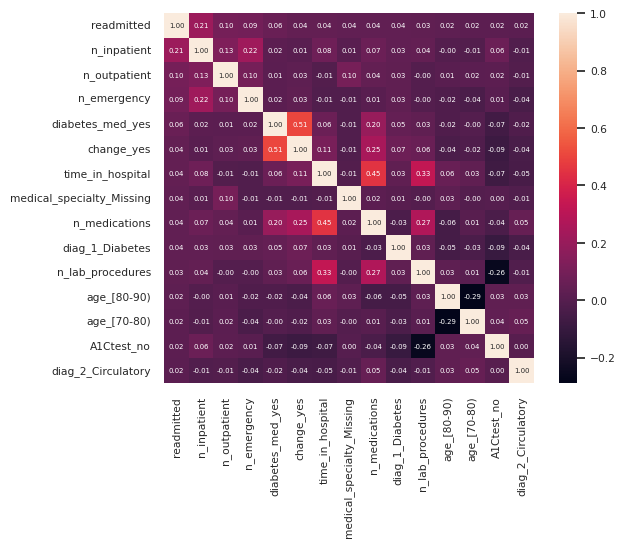

In [8]:
corrmat = df_enc.corr() 
cols = corrmat.nlargest(15, 'readmitted')['readmitted'].index 
cm = np.corrcoef(df_enc[cols].values.T) 
sns.set(font_scale=0.7) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)

## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 1. What is the most common primary diagnosis by age group?

In [50]:

df_age = df[['age','diag_1']].value_counts().unstack()
print(df_age)

diag_1    Circulatory  Diabetes  Digestive  Injury  Musculoskeletal  Other  \
age                                                                          
[40-50)           504       369        271     162              100    750   
[50-60)          1256       393        442     273              230   1164   
[60-70)          1962       385        554     400              373   1402   
[70-80)          2392       385        585     444              373   1693   
[80-90)          1482       181        402     321              168   1269   
[90-100)          228        34         75      66                8    220   

diag_1    Respiratory  
age                    
[40-50)           376  
[50-60)           694  
[60-70)           836  
[70-80)           964  
[80-90)           691  
[90-100)          119  


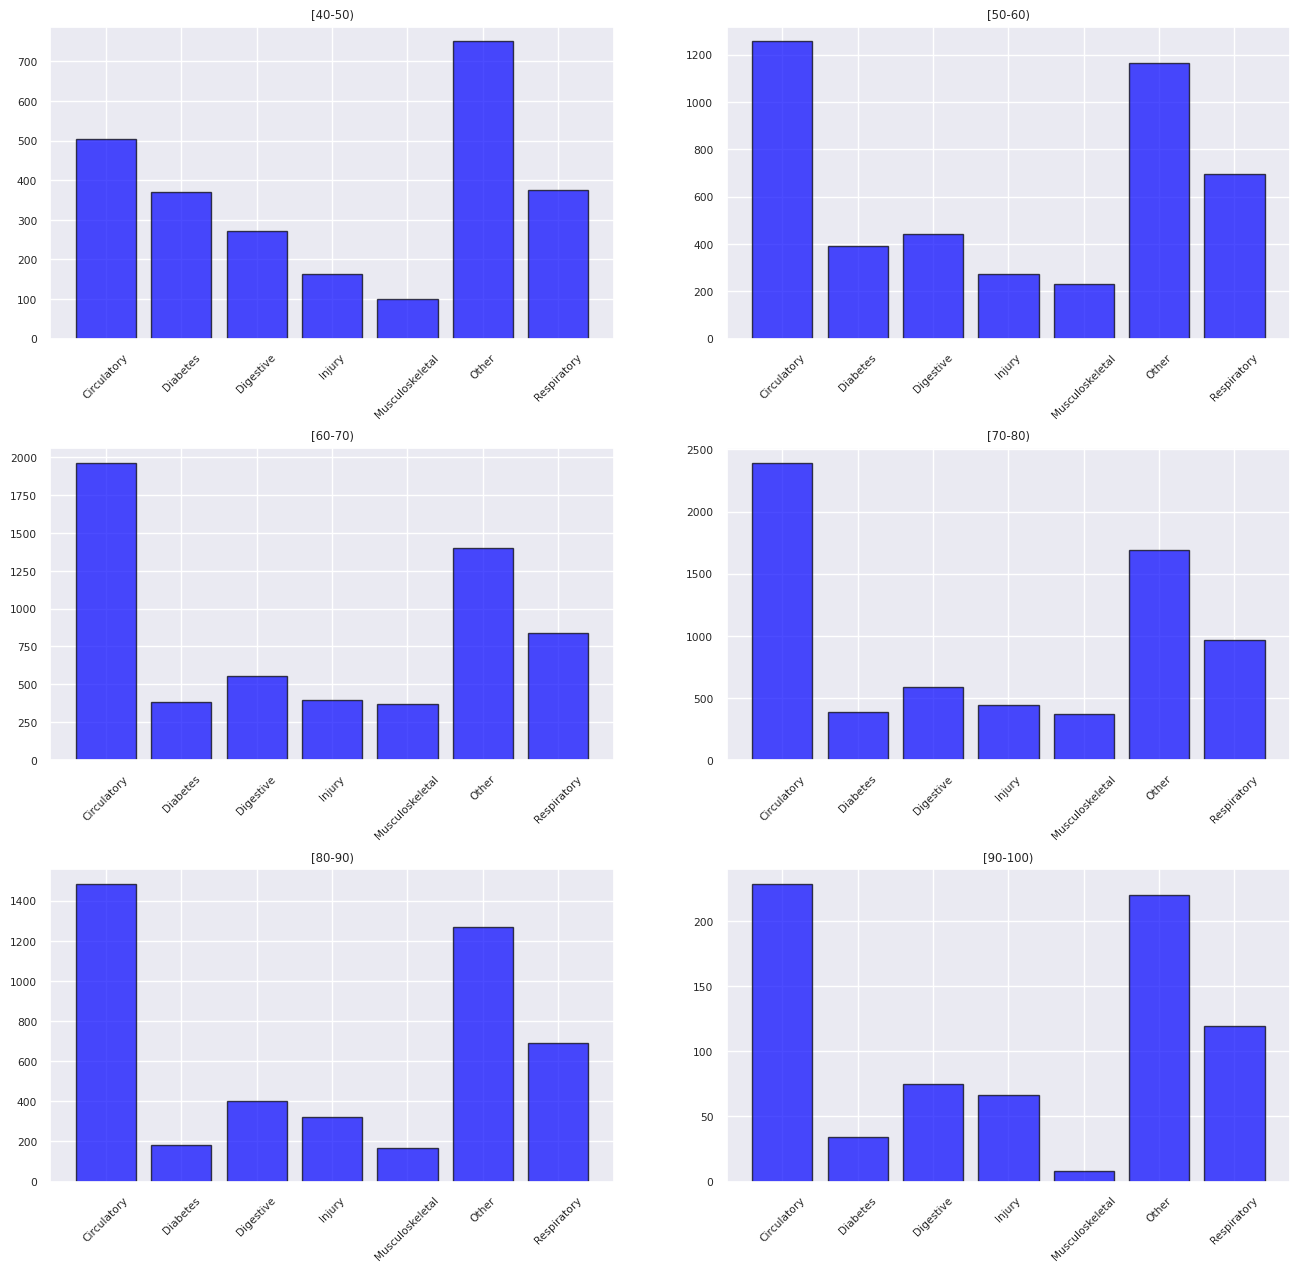

In [117]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))
plt.subplots_adjust(hspace=0.35)

for i, ax in zip(df_age.index, axs.ravel()):
    ax.bar(df_age.columns,df_age.loc[i], color='blue', edgecolor='black', alpha=0.7)
    ax.set_xticks(df_age.columns)
    ax.set_xticklabels(df_age.columns, rotation = 45)
    ax.set_title(i)
plt.show()


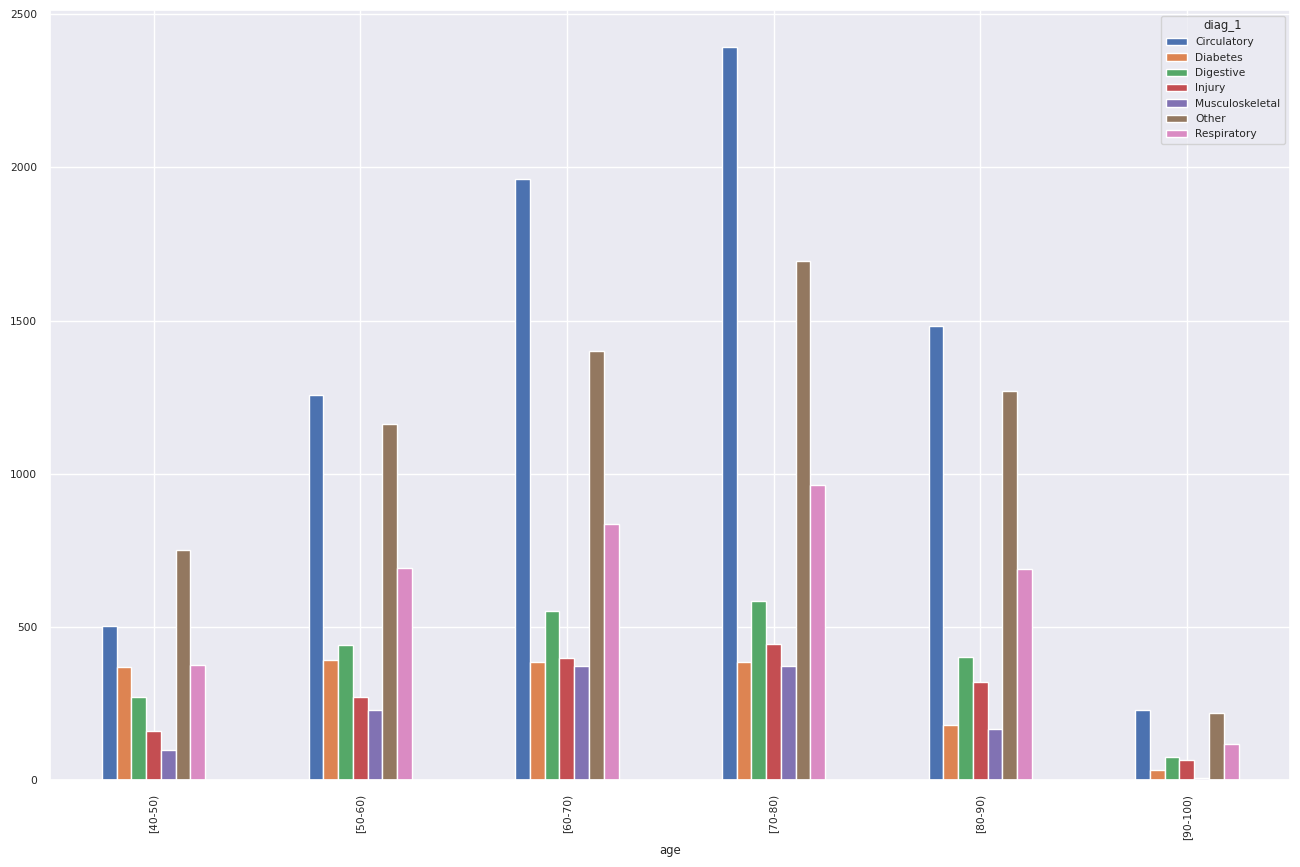

In [118]:
df_age.plot(kind='bar', stacked=False, figsize=(16, 10))
plt.show()

## 2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 

In [171]:
# df_diabetes = df[(df['diag_1'] == 'Diabetes') | (df['diag_2'] == 'Diabetes') | (df['diag_3'] == 'Diabetes')]
df_diabetes = df[['diag_1','diag_2','diag_3','readmitted']].copy(deep=True)
df_diabetes['readmitted'] = df_diabetes['readmitted'].map({'no': 0,'yes': 1})
df_diabetes['diag_1'].unique()

df_diabetes['diag_1'] = df_diabetes['diag_1'].map({('Circulatory', 'Digestive', 'Musculoskeletal', 'Other',
       'Injury', 'Respiratory'): 0,'Diabetes': 1})

df_diabetes['diag_2'] = df_diabetes['diag_2'].map({('Circulatory', 'Digestive', 'Musculoskeletal', 'Other',
       'Injury', 'Respiratory'): 0,'Diabetes': 1})

df_diabetes['diag_3'] = df_diabetes['diag_3'].map({('Circulatory', 'Digestive', 'Musculoskeletal', 'Other',
       'Injury', 'Respiratory'): 0,'Diabetes': 1})
df_diabetes.head(10)

df_diabetes.fillna(0, inplace=True)

df_diabetes['diag_1'] = df_diabetes['diag_1'].astype(int)
df_diabetes['diag_2'] = df_diabetes['diag_2'].astype(int)
df_diabetes['diag_3'] = df_diabetes['diag_3'].astype(int)

df_diabetes['diag'] = df_diabetes['diag_1'] + df_diabetes['diag_2'] + df_diabetes['diag_3']
df_diabetes['diag'] = df_diabetes['diag'].map({0: 0, 1: 1, 2: 1, 3: 1})
df_diabetes.head(50)

count = np.array(df_diabetes['diag'] == df_diabetes['readmitted'])
count_ratio = np.count_nonzero(count == True) / len(count) * 100
print(f'Ratio of readmitted people with diagnosed diabetes to all tested people is {count_ratio:.2f}%.')

Ratio of readmitted people with diagnosed diabetes to all tested people is 50.54%.


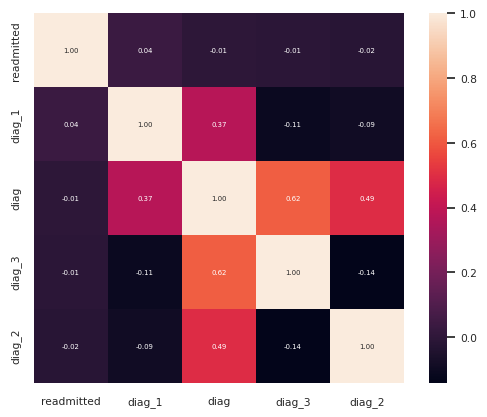

In [166]:
corrmat = df_diabetes.corr() 
cols = corrmat.nlargest(df_diabetes.shape[1], 'readmitted')['readmitted'].index 
cm = np.corrcoef(df_diabetes[cols].values.T) 
sns.set(font_scale=0.7) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)

## 3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

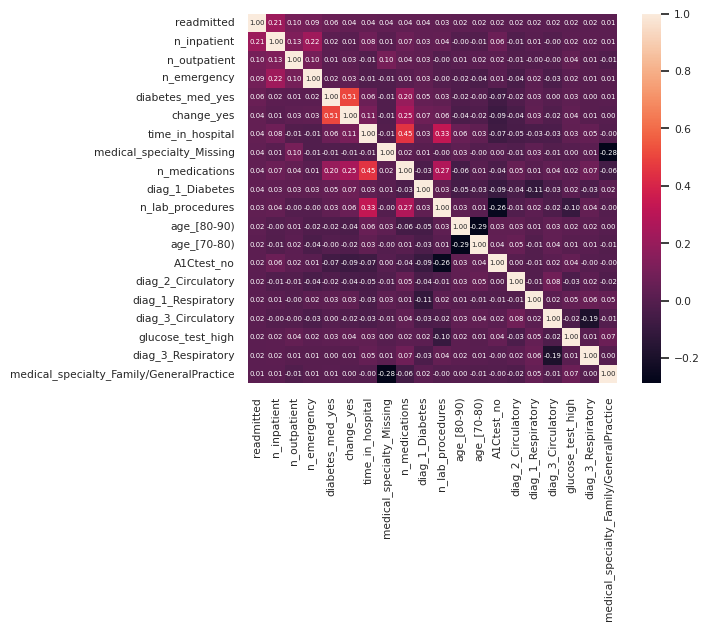

In [178]:
corrmat = df_enc.corr() 
cols = corrmat.nlargest(20, 'readmitted')['readmitted'].index 
cm = np.corrcoef(df_enc[cols].values.T) 
sns.set(font_scale=0.7) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)

In [182]:
corr_np = df_enc.corr().sort_values('readmitted', ascending=False)['readmitted']
corr_np.abs().sort_values(ascending=False)

readmitted                                  1.000000
n_inpatient                                 0.212480
n_outpatient                                0.095487
n_emergency                                 0.093519
diabetes_med_yes                            0.062145
diabetes_med_no                             0.062145
n_procedures                                0.044467
change_yes                                  0.043214
change_no                                   0.043214
time_in_hospital                            0.043141
medical_specialty_Other                     0.038313
medical_specialty_Missing                   0.037585
n_medications                               0.036871
diag_1_Diabetes                             0.036349
diag_1_Musculoskeletal                      0.034407
n_lab_procedures                            0.032970
diag_3_Missing                              0.032850
age_[50-60)                                 0.026636
medical_specialty_Surgery                   0.